In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense,Reshape,Conv2D,Flatten,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 

In [2]:
env=gym.make("Pong-v0")
observation=env.reset()
prev_input=None

D:\jupyternotebooks\tfu\lib\site-packages\gym\envs\registration.py:506: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v5` with the environment ID `ALE/Pong-v5`.
  f"The environment {path} is out of date. You should consider "
D:\jupyternotebooks\tfu\lib\site-packages\gym\utils\seeding.py:139: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  "Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. "
D:\jupyternotebooks\tfu\lib\site-packages\gym\utils\seeding.py:176: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  "Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. "


In [3]:
up_action=2
down_action=3

In [4]:
gamma=0.99

In [5]:
x_train,y_train,rewards=[],[],[]
reward_sum=0
episode_num=0

D:\jupyternotebooks\tfu\lib\site-packages\gym\utils\seeding.py:48: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "


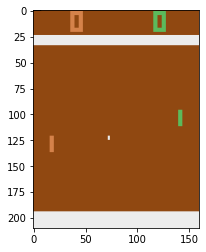

In [6]:
for i in range(22):
    if i>20:
        plt.imshow(observation)
        plt.show()
    observation, _, _, _=env.step(1)

In [7]:
def preprocess(image):
    image=image[35:195]
    image=image[::2,::2,0]
    image[image==144]=0
    image[image==109]=0
    image[image!=0]=1
    return image.astype(np.float64).ravel()

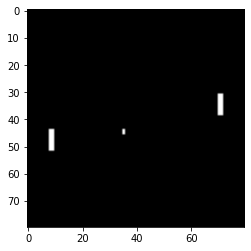

In [8]:
observation_preprocessed=preprocess(observation).reshape(80,80)
plt.imshow(observation_preprocessed,cmap='gray')
plt.show()

In [9]:
def discount_rewards(r,gamma):
    r=np.array(r)
    discounted_r=np.zeros_like(r)
    running_add=0
    
    for t in reversed(range(0,r.size)):
        if r[t]!=0:
            running_add=0
        running_add=running_add*gamma+r[t]
        discounted_r[t]=running_add
    discounted_r-=np.mean(discounted_r)
    discounted_r/=np.std(discounted_r)
    return discounted_r
        

In [10]:
model=Sequential()
model.add(Dense(units=200,input_dim=80*80,activation='relu',kernel_initializer="glorot_uniform"))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer="RandomNormal"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1280200   
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1,280,401
Trainable params: 1,280,401
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [14]:
history=[]
observation=env.reset()
prev_input=None

while (True):
    cur_input=preprocess(observation)
    
    x=cur_input-prev_input if prev_input is not None else np.zeros(80*80)
    prev_input=cur_input
    
    prob=model.predict(np.expand_dims(x,axis=1).T)
    
    action= up_action if np.random.uniform()<prob else down_action
    
    y=1 if action==2 else 0
    
    x_train.append(x)
    y_train.append(y)
    
    observation,reward,done,info=env.step(action)
    rewards.append(reward)
    reward_sum+=reward
    
    if done:
        history.append(reward_sum)
        print("At the end of the episode {} the total reward was {}".format(episode_num,reward_sum))
        if episode_num>=100 and reward_sum>=-12:
            break 
        else :
            
            episode_num+=1
            
            model.fit(x=np.vstack(x_train),y=np.vstack(y_train),verbose=1,sample_weight=discount_rewards(rewards,gamma),batch_size=512)
            
            x_train,y_train,rewards=[],[],[]
            observation=env.reset()
            reward_sum=0
            prev_input=None

At the end of the episode 0 the total reward was -29.0
4/4 [==============================] - 1s 14ms/step - loss: -6.1833e-04 - accuracy: 0.4977
At the end of the episode 1 the total reward was -21.0
3/3 [==============================] - 0s 10ms/step - loss: 7.0058e-04 - accuracy: 0.5363
At the end of the episode 2 the total reward was -20.0
3/3 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.5288
At the end of the episode 3 the total reward was -21.0
3/3 [==============================] - 0s 10ms/step - loss: -0.0025 - accuracy: 0.5316
At the end of the episode 4 the total reward was -19.0
4/4 [==============================] - 0s 9ms/step - loss: -0.0026 - accuracy: 0.5460
At the end of the episode 5 the total reward was -20.0
3/3 [==============================] - 0s 11ms/step - loss: -6.4581e-04 - accuracy: 0.5314
At the end of the episode 6 the total reward was -21.0
4/4 [==============================] - 0s 9ms/step - loss: -0.0018 - accuracy: 0.5508

4/4 [==============================] - 0s 9ms/step - loss: -0.0119 - accuracy: 0.6196
At the end of the episode 58 the total reward was -21.0
4/4 [==============================] - 0s 12ms/step - loss: -0.0038 - accuracy: 0.6539
At the end of the episode 59 the total reward was -19.0
3/3 [==============================] - 0s 12ms/step - loss: 0.0079 - accuracy: 0.6478
At the end of the episode 60 the total reward was -17.0
4/4 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.6608
At the end of the episode 61 the total reward was -21.0
3/3 [==============================] - 0s 8ms/step - loss: -0.0101 - accuracy: 0.6350
At the end of the episode 62 the total reward was -21.0
3/3 [==============================] - 0s 11ms/step - loss: -0.0132 - accuracy: 0.6702
At the end of the episode 63 the total reward was -21.0
3/3 [==============================] - 0s 10ms/step - loss: -0.0142 - accuracy: 0.6299
At the end of the episode 64 the total reward was -21.0
3/3 

KeyboardInterrupt: 

In [15]:
model.save("100eps")

INFO:tensorflow:Assets written to: 100eps\assets


In [19]:
import gym
from gym import logger as gymlogger
# from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

FileNotFoundError: [WinError 2] The system cannot find the file specified